### Importing libraries

In [54]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns

### Reading Data

In [55]:
# load dataset
url = "./new_Base_CDM_balanced_V2.csv"
dataset = pd.read_csv(url)
columns = [[dataset[str(c)][0],c ]for c in dataset.columns]

dataset.drop(index=dataset.index[0], 
        axis=0, 
        inplace=True)
cols =pd.DataFrame(columns)
cols.transpose()

,0,1,2,3,4,5,6,7
0,Display,cor_sales_in_vol,cor_sales_in_val,CA_mag,value,ENSEIGNE,VenteConv,Feature
1,Y,X1,X2,X3,X4,X5,X6,X7


In [56]:
dict(zip(cols[0], cols[1]))

{'Display': 'Y',
 'cor_sales_in_vol': 'X1',
 'cor_sales_in_val': 'X2',
 'CA_mag': 'X3',
 'value': 'X4',
 'ENSEIGNE': 'X5',
 'VenteConv': 'X6',
 'Feature': 'X7'}

In [57]:
dataset.head()

,Y,X1,X2,X3,X4,X5,X6,X7
1,No_Displ,2,20.2,47400,36,CORA,72,No_Feat
2,No_Displ,2,11.9,62000,24,LECLERC,48,No_Feat
3,No_Displ,8,29.52,60661,60,AUCHAN,480,No_Feat
4,No_Displ,2,16.2,59677,19,CARREFOUR,38,No_Feat
5,No_Displ,5,62.1,142602,50,CORA,250,No_Feat


In [47]:
#Renaming variables 
dataset.rename(columns = dict(zip(cols[1], cols[0])) , inplace = True)

In [48]:
dict(zip(cols[1], cols[0]))

{'Y': 'Display',
 'X1': 'cor_sales_in_vol',
 'X2': 'cor_sales_in_val',
 'X3': 'CA_mag',
 'X4': 'value',
 'X5': 'ENSEIGNE',
 'X6': 'VenteConv',
 'X7': 'Feature'}

In [49]:
pd.value_counts(dataset["Display"])
# No_Displ : 13000
# Displ : 12782
# =========> balanced data

No_Displ    13000
Displ       12782
Name: Display, dtype: int64

In [50]:
pd.value_counts(dataset["Feature"])

No_Feat    19495
Feat        6287
Name: Feature, dtype: int64

In [51]:
dataset.describe()

,Display,cor_sales_in_vol,cor_sales_in_val,CA_mag,value,ENSEIGNE,VenteConv,Feature
count,25782,25782,25782,25782,25782,25782,25782,25782
unique,2,363,8957,323,84,19,1589,2
top,No_Displ,1,7.5,109503,40,CARREFOUR,40,No_Feat
freq,13000,5827,64,255,3314,4629,828,19495


In [52]:
#Checking Missing values
dataset.isnull().sum()

Display             0
cor_sales_in_vol    0
cor_sales_in_val    0
CA_mag              0
value               0
ENSEIGNE            0
VenteConv           0
Feature             0
dtype: int64

### Test d'indépendance de khi-2

In [53]:
#### Test de chi-deux entre la variable Display' et 'ENSEIGNE' 
from scipy.stats import chi2_contingency as chi2_contingency

contingence = dataset[["Display","ENSEIGNE"]].pivot_table(index="Display",columns="ENSEIGNE",
aggfunc=len).fillna(0).copy().astype(int)

khi2, pval , ddl , contingent_theorique = chi2_contingency(contingence)
#la p-value est très inférieur à 0.05, on considère donc quil existe un lien entre la variable Display
# et la varible ENSEIGNE  : il y a dépendance
print(pval)



1.1069799512990182e-154


In [11]:
#### Test de chi-deux entre la variable Display et 'Feature' 

khi2, pval , ddl , contingent_theorique = chi2_contingency(contingence)
contingence = dataset[["Display","Feature"]].pivot_table(index="Display",columns="Feature",
aggfunc=len).fillna(0).copy().astype(int)

khi2, pval , ddl , contingent_theorique = chi2_contingency(contingence)
#la p-value est égale à 0 , on considère donc quil existe un lien entre la variable Display'
# et la varible 'Feature'  : il y a dépendance
print(pval)


0.0


In [12]:
quantitative_variables = ['cor_sales_in_vol', 'cor_sales_in_val', 'CA_mag', 'value', 'VenteConv']
for column_name in quantitative_variables :
    dataset[column_name]=dataset[column_name].astype(float)

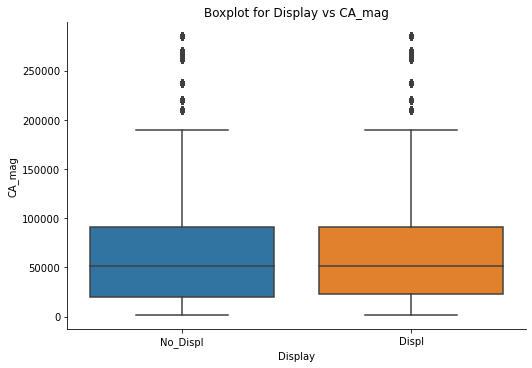

In [13]:
sns.catplot(x="Display", y="CA_mag", data=dataset, kind="box", aspect=1.5)
plt.title("Boxplot for Display vs CA_mag")
plt.show()

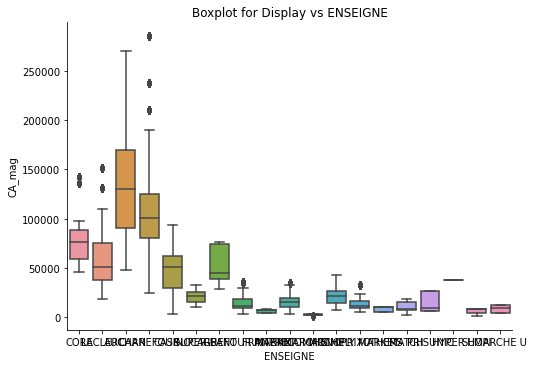

In [14]:
sns.catplot(x="ENSEIGNE", y="CA_mag", data=dataset, kind="box", aspect=1.5)
plt.title("Boxplot for Display vs ENSEIGNE")
plt.show()

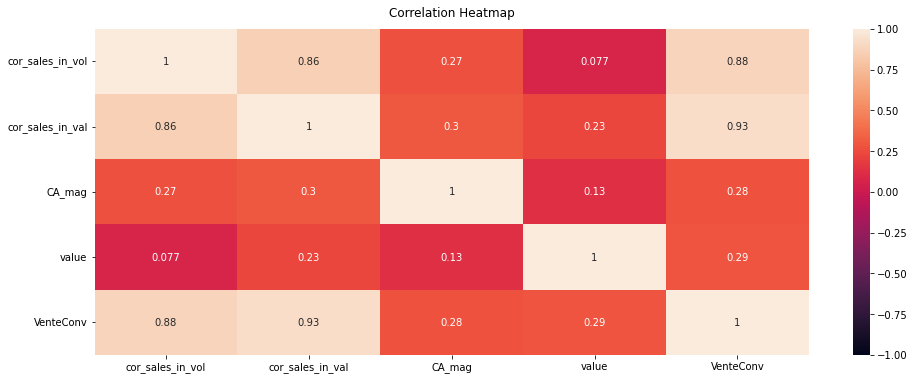

In [15]:
import seaborn as sns
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(dataset[quantitative_variables].corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

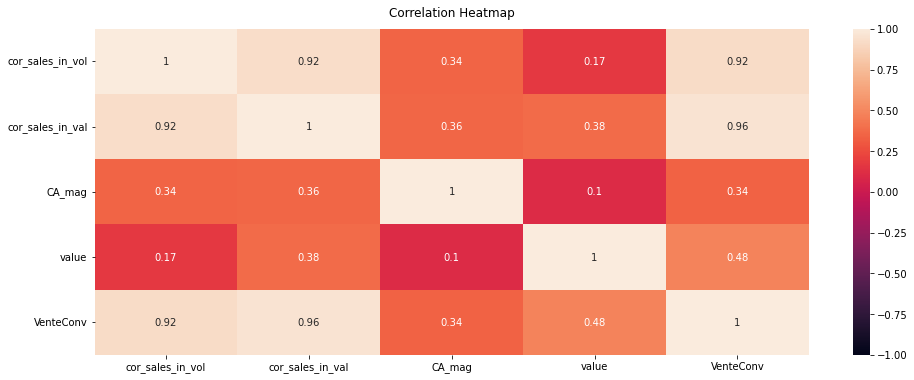

In [16]:
import seaborn as sns
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(dataset[quantitative_variables].corr(method="spearman"), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

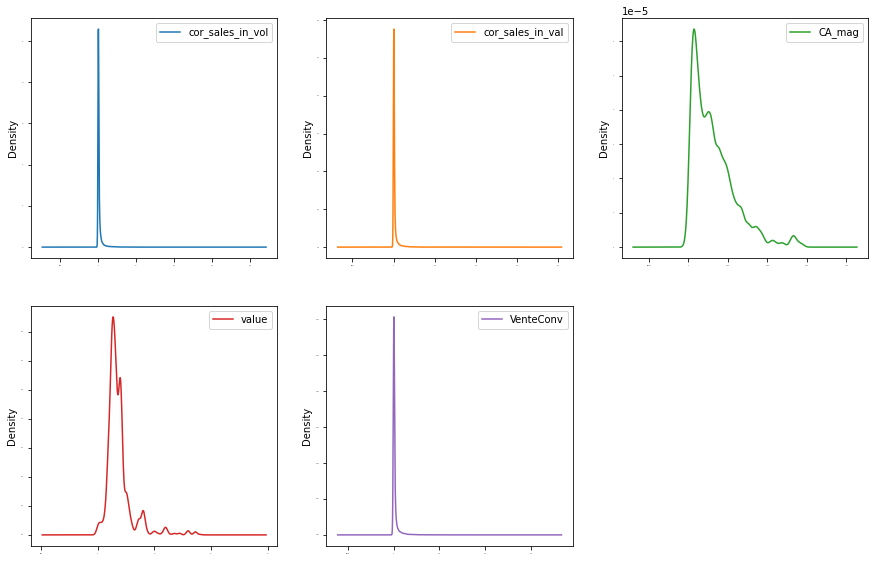

In [17]:
# density
dataset.plot(kind='density', subplots=True, layout=(3,3), sharex=False, legend=True, fontsize=1, figsize=(15,15))
plt.show()

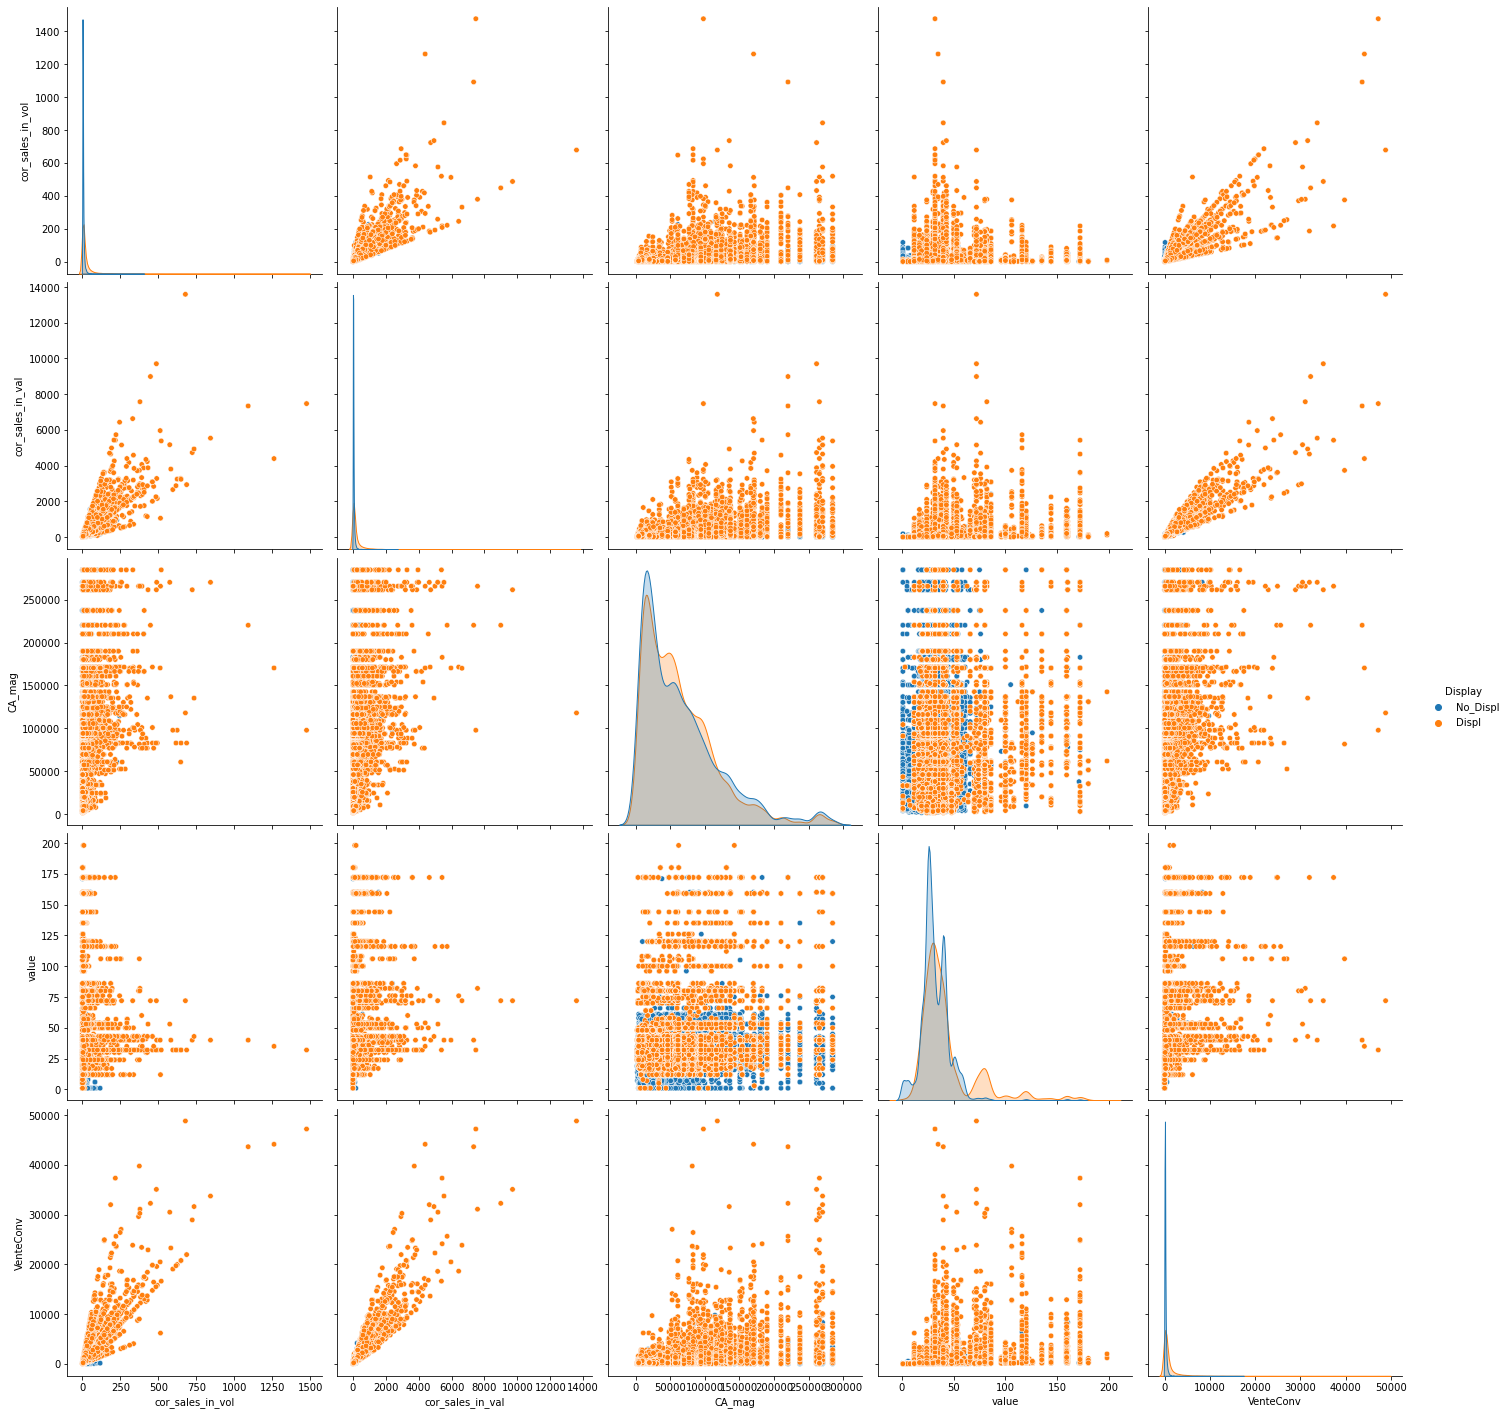

In [18]:
sns.pairplot(dataset, kind="scatter", hue="Display", plot_kws=dict(s=30, edgecolor="white", linewidth=0.5),height=4)
plt.show()

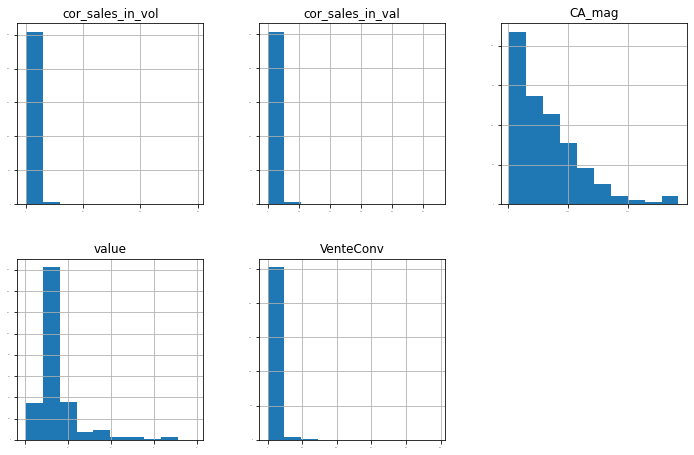

In [19]:
# histograms
dataset.hist(sharex=False, sharey=False, layout=(3,3), xlabelsize=1, ylabelsize=1, figsize=(12,12))
plt.show()

In [20]:
subset

NameError: name 'subset' is not defined

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Load the data
X = [[1, 2, 3],
     [4, 5, 6],
     [7, 8, 9],
     [10, 11, 12],
     [13, 14, 15]]
y = [0, 1, 0, 1, 0]

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Use RFE to select a set of candidate features
model = LinearRegression()

candidate_features = X_train

# Try different subsets of features and select the one with the lowest description length
best_subset = None
best_description_length = float('inf')

for i in range(1, candidate_features.shape[1]):
    # Select a subset of features
    subset = candidate_features[:, :i]

    # Fit a model to the training data using the subset of features
    model.fit(subset, y_train)

    # Calculate the description length of the model
    description_length = calculate_description_length(subset, y_train, model)

    # Update the best subset of features if necessary
    if description_length < best_description_length:
        best_description_length = description_length
        best_subset = subset

# Use the best subset of features to make predictions on the test set
model.fit(best_subset, y_train)
predictions = model.predict(best_subset)

[[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12], [13, 14, 15]]


In [ ]:
df.sample(3).values

array([['Displ', '1', '13', '33170', '48', 'INTERMARCHE', '48',
        'No_Feat'],
       ['No_Displ', '2', '16.5', '71202', '40', 'CARREFOUR', '80',
        'No_Feat'],
       ['No_Displ', '22', '34.32', '34000', '1', 'LECLERC', '22',
        'No_Feat']], dtype=object)

In [ ]:
this is sample of data
X= [[ 1, 13, 33170, 48, 48],
       [ 2, 16.5, 71202, 40, 80],
       [22, 34.32, 34000, 1, 22]]
Y = [1,0,0]
